# Intersection with a crosswalk

**Load dependencies**

In [1]:
using Revise
using Random
using Printf
using DataStructures
using Flux
using POMDPs
using POMDPModelTools
using POMDPSimulators
using BeliefUpdaters
using POMDPPolicies
using DiscreteValueIteration
using MDPModelChecking
using StaticArrays
using RLInterface
using DeepQLearning
using AutomotiveDrivingModels
using AutomotivePOMDPs
using AutomotiveSensors
using LocalApproximationValueIteration
using Reel
using AutoViz
using ProgressMeter
using JLD2
using FileIO
using BSON
using PedCar

┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/POMDPSimulators/i1HOp.ji for POMDPSimulators [e0d0a172-29c6-5d4e-96d0-f262df5d01fd]
└ @ Base loading.jl:1184


loaded


┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/MDPModelChecking/XrC4q.ji for MDPModelChecking [abefb91b-a28c-5ab9-9bd9-026e532d7b0e]
└ @ Base loading.jl:1184
Expr(:toplevel, Expr(:const, :Abc = 0), Expr(:const, :Pnn = 1), Expr(:const, :SHARED_PTR_DISOWN = 0), Expr(:const, :SwigPyIterator = PyCall.PyObject(o=0x0000000002e0f6e8)), Expr(:const, :SwigPyIterator_swigregister = PyCall.PyObject(o=0x00007fcc144323f0)), Expr(:const, :__builtins__ = Base.Dict{Any, Any}(slots=Array{UInt8, (256,)}[0x01, 0x01, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00, 0x00, 0x01, 0x01, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x01, 0x01, 0x00, 0x01, 0x01, 0x01, 0x01, 0x00, 0x01, 0x00, 0x01, 0x00, 0x00, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x01, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 0x01, 0x01, 0x01, 0x00, 0x00, 0x01, 0x01, 0x00, 0x01, 0x01, 0x01, 0x01, 0x01, 0x00, 0x00, 0x01, 0x01, 0x00, 0x00, 

  PyCall.PyObject(o=0x00007fcc14e5a6e0),
  #<null>,
  #<null>,
  PyCall.PyObject(o=0x00007fcc17900d38),
  #<null>,
  #<null>,
  #<null>,
  PyCall.PyObject(o=0x00007fcc14e47b40),
  PyCall.PyObject(o=0x00007fcc14e5a540),
  #<null>,
  #<null>,
  #<null>,
  PyCall.PyObject(o=0x00007fcc17907360),
  #<null>,
  #<null>,
  true,
  #<null>,
  #<null>,
  #<null>,
  PyCall.PyObject(o=0x00007fcc14e08620),
  PyCall.PyObject(o=0x00007fcc14e07c60),
  PyCall.PyObject(o=0x00007fcc17900cf0),
  PyCall.PyObject(o=0x00007fcc14e65420),
  PyCall.PyObject(o=0x00007fcc14e5bd00),
  PyCall.PyObject(o=0x00007fcc17900af8),
  PyCall.PyObject(o=0x00007fcc14e07ac0),
  PyCall.PyObject(o=0x00007fcc17900dc8),
  PyCall.PyObject(o=0x00007fcc17900ee8),
  PyCall.PyObject(o=0x00007fcc14e63340),
  #<null>,
  false,
  PyCall.PyObject(o=0x00007fcc14e4c640),
  PyCall.PyObject(o=0x00007fcc14e641e0),
  PyCall.PyObject(o=0x00007fcc14e378e0),
  #<null>,
  #<null>,
  #<null>,
  #<null>,
  #<null>,
  PyCall.PyObject(o=0x00007fcc14e06d

  PyCall.PyObject(o=0x00007fcc14e5a880)], ndel=0, count=152, age=0x000000000000009a, idxfloor=1, maxprobe=6)), Expr(:const, :__cached__ = "/mnt/c/Users/Maxime/wsl/.julia/conda/3/lib/python3.7/site-packages/spot/__pycache__/__init__.cpython-37.pyc"), Expr(:const, :__doc__ = nothing), Expr(:const, :__file__ = "/mnt/c/Users/Maxime/wsl/.julia/conda/3/lib/python3.7/site-packages/spot/__init__.py"), Expr(:const, :__loader__ = PyCall.PyObject(o=0x00007fcc1478b5c0)), Expr(:const, :__name__ = "spot"), Expr(:const, :__om_init_new = PyCall.PyObject(o=0x00007fcc140bc6a8)), Expr(:const, :__om_init_tmp = PyCall.PyObject(o=0x00007fcc141b5400)), Expr(:const, :__package__ = "spot"), Expr(:const, :__path__ = Array{String, (1,)}["/mnt/c/Users/Maxime/wsl/.julia/conda/3/lib/python3.7/site-packages/spot"]), Expr(:const, :__spec__ = PyCall.PyObject(o=0x00007fcc1478b630)), Expr(:const, :_add_formula = PyCall.PyObject(o=0x00007fcc140c71e0)), Expr(:const, :_add_twa_graph = PyCall.PyObject(o=0x00007fcc140c7400))

Expr(:const, :random_formula_swigregister = PyCall.PyObject(o=0x00007fcc14443a20)), Expr(:const, :random_ltl = PyCall.PyObject(o=0x0000000002a9f688)), Expr(:const, :random_ltl_swigregister = PyCall.PyObject(o=0x00007fcc14443b40)), Expr(:const, :random_psl = PyCall.PyObject(o=0x00000000030d79d8)), Expr(:const, :random_psl_swigregister = PyCall.PyObject(o=0x00007fcc14443fc0)), Expr(:const, :random_sere = PyCall.PyObject(o=0x0000000003a1dd28)), Expr(:const, :random_sere_swigregister = PyCall.PyObject(o=0x00007fcc14443e10)), Expr(:const, :randomize = PyCall.PyObject(o=0x00007fcc14449d80)), Expr(:const, :relabel = PyCall.PyObject(o=0x00007fcc144446c0)), Expr(:const, :relabel_bse = PyCall.PyObject(o=0x00007fcc14444708)), Expr(:const, :relabel_here = PyCall.PyObject(o=0x00007fcc1444e7e0)), Expr(:const, :relabeling_map = PyCall.PyObject(o=0x0000000003011858)), Expr(:const, :relabeling_map_swigregister = PyCall.PyObject(o=0x00007fcc1443aa20)), Expr(:const, :remove_alternation = PyCall.PyObject(

=0x00007fcc14447b88)), Expr(:const, :to_generalized_buchi = PyCall.PyObject(o=0x00007fcc1444a0d8)), Expr(:const, :to_generalized_rabin = PyCall.PyObject(o=0x00007fcc1444a1b0)), Expr(:const, :to_generalized_streett = PyCall.PyObject(o=0x00007fcc1444a1f8)), Expr(:const, :to_nca = PyCall.PyObject(o=0x00007fcc14447ab0)), Expr(:const, :to_parity = PyCall.PyObject(o=0x00007fcc1444f8b8)), Expr(:const, :to_weak_alternating = PyCall.PyObject(o=0x00007fcc1444e5a0)), Expr(:const, :translate = PyCall.PyObject(o=0x00007fcc140c7158)), Expr(:const, :translator = PyCall.PyObject(o=0x0000000002c290d8)), Expr(:const, :translator_swigregister = PyCall.PyObject(o=0x00007fcc1444e510)), Expr(:const, :trival = PyCall.PyObject(o=0x000000000285f3d8)), Expr(:const, :trival_maybe = PyCall.PyObject(o=0x00007fcc14432cf0)), Expr(:const, :trival_swigregister = PyCall.PyObject(o=0x00007fcc14433168)), Expr(:const, :twa = PyCall.PyObject(o=0x0000000002622568)), Expr(:const, :twa_graph = PyCall.PyObject(o=0x00000000034c

list_formula_props, :list_step, :list_step_swigregister, :liststr, :liststr_swigregister, :ltl_to_taa, :ltl_to_tgba_fm, :magic_search, :make_bdd_dict, :make_emptiness_check_instantiator, :make_stutter_invariant_forward_closed_inplace, :make_ta_explicit, :make_taa_tgba_formula, :make_taa_tgba_string, :make_tgta_explicit, :make_twa_graph, :make_twa_word, :mark_container, :mark_container_swigregister, :mark_iterator, :mark_iterator_swigregister, :mark_t, :mark_t_all, :mark_t_max_accsets, :mark_t_swigregister, :meth, :minato_isop, :minato_isop_swigregister, :minimize_monitor, :minimize_obligation, :minimize_ta, :minimize_tgta, :minimize_wdba, :mp_class, :mp_hierarchy_svg, :mrand, :nca_st_info, :nca_st_info_swigregister, :negative_normal_form, :nesting_depth, :nl_cerr, :nl_cout, :nrand, :nsa_to_dca, :nsa_to_nca, :ocheck_Auto, :ocheck_via_CoBuchi, :ocheck_via_Rabin, :ocheck_via_WDBA, :ofstream, :ofstream_swigregister, :op_And, :op_AndNLM, :op_AndRat, :op_Closure, :op_Concat, :op_EConcat, :op

In [2]:
includet("../src/masking.jl")
includet("../src/masked_dqn.jl")
includet("../src/qmdp_approximation.jl")
includet("../src/decomposed_tracking.jl")
includet("../src/decomposition.jl")
includet("../src/util.jl")
includet("../src/render_helpers.jl")

In [3]:
rng = MersenneTwister(1);
cam = FitToContentCamera(0.);

## Scenario

In [4]:
params = UrbanParams(nlanes_main=1,
                     crosswalk_pos =[VecSE2(6, 0., pi/2), VecSE2(-6, 0., pi/2), VecSE2(0., -5., 0.)],
                     crosswalk_length =  [14.0, 14., 14.0],
                     crosswalk_width = [4.0, 4.0, 3.1],
                     stop_line = 22.0)
env = UrbanEnv(params=params);

** Discrete states MDP **

In [5]:
mdp = PedCarMDP(env=env, pos_res=2.0, vel_res=2., ped_birth=0.7, car_birth=0.7);
init_transition!(mdp);

In [6]:
@printf("spatial resolution %2.1f m \n", mdp.pos_res)
@printf("pedestrian velocity resolution %2.1f m/s \n", mdp.vel_ped_res)
@printf("car velocity resolution %2.1f m/s \n", mdp.vel_res)
@printf("number of states %d \n", n_states(mdp))
@printf("number of actions %d \n", n_actions(mdp))

spatial resolution 2.0 m 
pedestrian velocity resolution 1.0 m/s 
car velocity resolution 2.0 m/s 
number of states 23456940 
number of actions 4 


**Continuous states MDP**

In [7]:
pomdp = UrbanPOMDP(env=env,
                   sensor = PerfectSensor(),
                   ego_goal = LaneTag(2, 1),
                   max_cars=1, 
                   max_peds=1, 
                   car_birth=0.7, 
                   ped_birth=0.7, 
                   max_obstacles=0., # no fixed obstacles
                   lidar=false,
                   ego_start=20,
                   ΔT=0.1);

## Load policies

In [8]:
@load "../training_scripts/pc_util_processed_low.jld2" qmat util pol
safe_policy = ValueIterationPolicy(mdp, qmat, util, pol);

In [9]:
threshold = 0.99
mask = SafetyMask(mdp, safe_policy, threshold);
continuous_safe_policy = SafePOMDPPolicy(mask, pomdp)
discrete_safe_random = MaskedEpsGreedyPolicy(mdp, 1.0, mask, rng)
continuous_safe_random = RandomMaskedPOMDPPolicy(mask, pomdp, rng);

In [10]:
qnetwork = BSON.load("../training_scripts/drqn-log/log20/model.bson")[:qnetwork]
weights = BSON.load("../training_scripts/drqn-log/log20/qnetwork.bson")[:qnetwork]
Flux.loadparams!(qnetwork, weights)
dqn_policy = NNPolicy(pomdp, qnetwork, actions(pomdp), 1)
masked_policy = MaskedNNPolicy(pomdp, dqn_policy, mask);

# Evaluation

**Discrete Environment: Safe Policy**

In [2]:
@time rewards_mask, steps_mask, violations_mask = evaluation_loop(mdp, safe_policy, n_ep=10000, max_steps=400, rng=rng);
print_summary(rewards_mask, steps_mask, violations_mask)

UndefVarError: UndefVarError: rng not defined

**Discrete Environment: Safe Random**

In [12]:
@time rewards_mask, steps_mask, violations_mask = evaluation_loop(mdp, discrete_safe_random, n_ep=10000, max_steps=400, rng=rng);
print_summary(rewards_mask, steps_mask, violations_mask)

Progress:   0%|                                         |  ETA: 0:02:12

UndefVarError: UndefVarError: a_lon not defined

**Continuous Environment: Safe Policy**

In [13]:
@time rewards_mask, steps_mask, violations_mask = evaluation_loop(pomdp, continuous_safe_policy, n_ep=1000, max_steps=400, rng=rng);
print_summary(rewards_mask, steps_mask, violations_mask)

Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:01

508.304257 seconds (2.92 G allocations: 213.361 GiB, 15.00% gc time)
Summary for 

Progress: 100%|█████████████████████████████████████████| Time: 0:08:24


1000 episodes: 
Average reward: 0.003 
Average # of steps: 230.378 
Average # of violations: 0.000 


**Continuous Environment: Safe Random**

In [14]:
@time rewards_mask, steps_mask, violations_mask = evaluation_loop(pomdp, continuous_safe_random, n_ep=1000, max_steps=400, rng=rng);
print_summary(rewards_mask, steps_mask, violations_mask)

Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:01

858.068648 seconds (5.38 G allocations: 391.846 GiB, 15.29% gc time)
Summary for 1000 episodes: 
Average reward: 0.000 
Average # of steps: 391.083 
Average # of violations: 0.000 


Progress: 100%|█████████████████████████████████████████| Time: 0:14:18


###### **Continuous Environment: Safe RL**

In [15]:
@time rewards_mask, steps_mask, violations_mask = evaluation_loop(pomdp, masked_policy, n_ep=1000, max_steps=400, rng=rng);
print_summary(rewards_mask, steps_mask, violations_mask)

Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00

187.649868 seconds (1.21 G allocations: 87.823 GiB, 15.07% gc time)
Summary for 1000 episodes: 
Average reward: 0.018 
Average # of steps: 113.358 
Average # of violations: 0.000 


Progress: 100%|█████████████████████████████████████████| Time: 0:03:07


In [17]:
evaluation_policy = masked_evaluation(mask)
scores_eval = DeepQLearning.evaluation(evaluation_policy, dqn_policy, POMDPEnvironment(pomdp),                                  
                         1000,
                         400,
                         true)

Evaluation ... Avg Reward 0.99 | Violations (%) 0.00 | Avg Steps 112.92

0.991

**Collisions analysis**

In [18]:
test_policy = masked_policy;

In [19]:
hr = HistoryRecorder(rng=rng, max_steps=400)
s0 = initialstate(pomdp, rng)
up = PreviousObservationUpdater()
o0 = generate_o(pomdp, s0, UrbanAction(0.), s0, rng)
b0 = initialize_belief(up, o0)
@time hist2 = simulate(hr, pomdp, test_policy, up, b0, s0);

  0.232463 seconds (1.27 M allocations: 94.339 MiB, 16.42% gc time)


In [20]:
function POMDPModelTools.generate_sori(pomdp::UrbanPOMDP, s::Scene, a::UrbanAction, rng::AbstractRNG)
    sp, o, r = generate_sor(pomdp, s, a, rng)
    return sp, o, r, deepcopy(pomdp.models)
end

In [21]:
function find_collision(pomdp, test_policy, rng)
    up = PreviousObservationUpdater()
    @showprogress for ep=1:10000
        hr = HistoryRecorder(rng=rng, max_steps=400)
        s0 = initialstate(pomdp, rng)
        o0 = generate_o(pomdp, s0, UrbanAction(0.), s0, rng)
        b0 = initialize_belief(up, o0)
        hist2 = simulate(hr, pomdp, test_policy, up, b0, s0)
        if sum(hist2.reward_hist .< 0.) != 0.
            println("Crash")
            return hist2
        end
    end
    return hist2 
end
hist2 = find_collision(pomdp, test_policy, rng);

Progress: 100%|█████████████████████████████████████████| Time: 0:48:31


In [13]:
h = hist2
state_hist = h.state_hist
action_hist = h.action_hist
belief_hist = h.belief_hist
safe_acts = [i[1] for i in h.ainfo_hist]
probas = [i[2] for i in h.ainfo_hist]
routes = [i[3] for i in h.ainfo_hist]

push!(safe_acts, [UrbanAction(NaN)])
push!(probas, [NaN])
push!(routes, PedCar.OFF_ROUTE)
push!(action_hist, UrbanAction(NaN))
duration, fps, render_hist = animate_states(pomdp, state_hist, action_hist, belief_hist, safe_acts, probas, routes, mask, interp=true, obsviz=true)
speed_factor = 2
film = roll(render_hist, fps = speed_factor*fps, duration = duration/speed_factor)

Frames{MIME{Symbol("image/png")}}("/tmp/tmpIL2hzk", 0x000000000000014c, 20.0, nothing)

In [14]:
hist = hist2
step = 318
s = hist.state_hist[step]
models = hist.info_hist[step]
o = generate_o(pomdp, s, rng);

In [22]:
veh.state.v

4.925162298159967

In [15]:
hist = hist2
step = 318
s = hist.state_hist[step]
vehid = 2
veh = s[findfirst(vehid, s)]
m = hist.info_hist[step][vehid]
cwid = 2
cwm = m.crosswalk_drivers[cwid]
intm = m.intersection_driver

[l.tag for l in intm.navigator.route]

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)
Closest candidates are:
  getindex(::Any, !Matched::AbstractTrees.ImplicitRootState) at /mnt/c/Users/Maxime/wsl/.julia/packages/AbstractTrees/gbHmA/src/AbstractTrees.jl:344

In [18]:
s_mdp = get_mdp_state(mdp, pomdp.models, s, 101, 2)
s_itp, w_itp = interpolate_state(mdp, s_mdp)
sdisc = s_itp[argmax(w_itp)]

PedCarMDPState(false, VehicleState(VecSE2({0.108, -0.344}, 2.298), Frenet(RoadIndex({12, 0.111909}, {13, 1}), 4.000, 0.000, 0.000), 2.000), VehicleState(VecSE2({-6.000, -1.000}, 1.571), Frenet(RoadIndex({1, 0.428571}, {18, 1}), 6.000, 0.000, 0.000), 1.000), VehicleState(VecSE2({24.000, 1.500}, 3.142), Frenet(RoadIndex({1, 0.250000}, {1, 1}), 6.000, 0.000, 0.000), 4.000), LaneTag[LaneTag(1, 1), LaneTag(5, 1)])

In [43]:
AutomotivePOMDPs.is_intersection_clogged(intm, s, env.roadway, vehid)
AutomotivePOMDPs.engaged(intm, s, env.roadway, vehid)
AutomotiveDrivingModels.observe!(deepcopy(intm), s, env.roadway, vehid)

Vehicle 2 : emergency break
veh 2 | clogged true | passed false | engaged true | stop false| right of way true


TTCIntersectionDriver
  a: LonAccelDirection
  navigator: RouteFollowingIDM
  intersection: Array{Lane}((2,))
  intersection_pos: VecSE2{Float64}
  ttc_threshold: Float64 3.0
  horizon: Float64 20.0
  stop_delta: Float64 4.0
  accel_tol: Float64 0.0
  priorities: Dict{Tuple{LaneTag,LaneTag},Bool}
  priority: Bool false
  stop: Bool true


┌ Warning: /home/maxime/Maxime/OneDrive - Leland Stanford Junior University/Research/AutomotivePOMDPs/src/driver_models is not an existing directory, Revise is not watching
└ @ Revise /mnt/c/Users/Maxime/wsl/.julia/packages/Revise/TmjcT/src/Revise.jl:361


In [42]:
s[2]

Vehicle(2, VehicleState(VecSE2({4.349, 1.500}, 3.142), Frenet(RoadIndex({1, 0.137579}, {7, 1}), 1.651, 0.000, 0.000), 2.200), VehicleDef(CAR, 4.000, 1.800))

### Collision analysis in the discrete MDP

In [49]:
hr = HistoryRecorder(rng=rng, max_steps=400)
s0 = initialstate(mdp, rng)
@time hist2 = simulate(hr, mdp, discrete_safe_random, s0);

  0.296488 seconds (162.34 k allocations: 9.622 MiB)


In [47]:
function find_collision(mdp::MDP, test_policy, rng)
    @showprogress for ep=1:10000
        hr = HistoryRecorder(rng=rng, max_steps=400)
        s0 = initialstate(mdp, rng)
        hist2 = simulate(hr, mdp, test_policy, s0);
        if sum(hist2.reward_hist .< 0.) != 0.
            println("Crash")
            return hist2
        end
    end
    return hist2
end
hist2 = find_collision(mdp, safe_policy, rng);

Progress:  35%|██████████████                           |  ETA: 0:22:44

Crash


Progress: 100%|█████████████████████████████████████████| Time: 0:12:02


In [50]:
push!(hist2.action_hist, UrbanAction(NaN))
duration, fps, render_hist = animate_states(mdp, hist2.state_hist, hist2.action_hist, mask, overlays=SceneOverlay[IDOverlay()])
speed_factor = 2
film = roll(render_hist, fps = speed_factor*fps, duration = duration/speed_factor)

Frames{MIME{Symbol("image/png")}}("/tmp/tmpB62XHi", 0x0000000000000056, 4.0, nothing)

## Analyze value at custom state

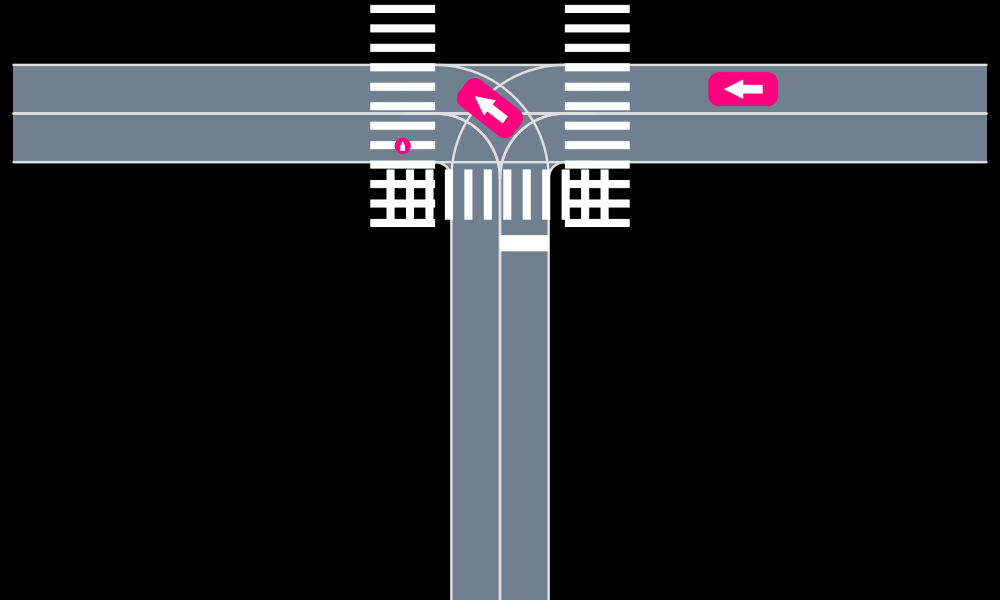

In [76]:
# Set car parameter
car_on = true
car_s0 = 15.
car_v0 = 6.
car_posF = Frenet(env.roadway[LaneTag(1, 1)], car_s0)
car = Vehicle(VehicleState(car_posF, env.roadway, car_v0), pomdp.car_type, 2)

# Set pedestrian parameter
ped_on = false
ped_s0 = 5.
ped_v0 = 0.
ped_posF = Frenet(env.ped_roadway[LaneTag(18,1)], ped_s0, 0., 0.) # choose between 17, 18, 19
ped = Vehicle(VehicleState(ped_posF, env.roadway, ped_v0), pomdp.ped_type, 101)

# Set ego vehicle 
ego_s0 = 5.
ego_v0 = 0.
ego_posF = Frenet(env.roadway[LaneTag(13, 1)], ego_s0)
ego = Vehicle(VehicleState(ego_posF, env.roadway, ego_v0), pomdp.car_type, 1)

s_mdp = PedCarMDPState(false, ego.state, ped.state, car.state, SVector(LaneTag(1,1), LaneTag(2,1)))
itp_s, itp_weight = interpolate_state(mdp, s_mdp)
s_mdp = itp_s[argmax(itp_weight)]

s = Scene()
push!(s, car)
push!(s, ped)
push!(s, ego)

AutoViz.render(s, env, cam=cam)

In [31]:
hr = HistoryRecorder(rng=rng, max_steps=400)
s0 = sdisc
@time hist2 = simulate(hr, mdp, FunctionPolicy(s->UrbanAction(-4.0)), s0);
push!(hist2.action_hist, UrbanAction(NaN))
duration, fps, render_hist = animate_states(mdp, hist2.state_hist, hist2.action_hist, mask, overlays=SceneOverlay[IDOverlay()])
speed_factor = 2
film = roll(render_hist, fps = speed_factor*fps, duration = duration/speed_factor)

  0.224134 seconds (91.07 k allocations: 6.063 MiB, 7.57% gc time)


Frames{MIME{Symbol("image/png")}}("/tmp/tmpSqiXOB", 0x0000000000000191, 4.0, nothing)

In [46]:
# o = generate_o(pomdp, s, rng)
o = hist2.observation_hist[18]
s = hist2.state_hist[19]
ego = s[findfirst(EGO_ID, s)]
car = s[findfirst(CAR_ID, s)]
ped = s[findfirst(PED_ID, s)]
println(ego)
scene = Scene()
push!(scene, ego)
push!(scene, car)
push!(scene, Vehicle(VehicleState(ped_posF, env.roadway, ped_v0), pomdp.ped_type, 101))

SystemError: SystemError: opening file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/PedCar/NmDDZ.ji: No such file or directory

In [26]:
o = generate_o(pomdp, s, rng)
a, ai = action_info(continuous_safe_policy, o)
sa, probs, route = ai
println("Probas ", probs)

Probas [0.998689, 0.998689, 0.998689, 0.995578]


In [99]:
ped.state.posG

3-element VecSE2{Float64}:
 6.0               
 3.0000000000000018
 1.5707963267948966

In [75]:
car.state.posG

3-element VecSE2{Float64}:
 26.000000000000004
 -1.5              
  0.0              